In [45]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm

# Problem2:Data Partitioning

In [46]:
def Partitioning_MNIST(data, labels):
    """Return training_data, training_labels, validation_data, validation_labels of MNIST"""

    rng = np.random.default_rng()
    index = rng.permutation(60000)
    data_copy, labels_copy = np.reshape(np.squeeze(data[index], axis=1), (60000, 784)), labels[index]

    training_data = data_copy[:50000]
    training_labels = labels_copy[:50000]

    validation_data = data_copy[50000:]
    validation_labels = labels_copy[50000:]

    return training_data, training_labels, validation_data, validation_labels

In [47]:
def Partition_SPAM(data, labels):
    """Return training_data, training_labels, validation_data, validation_labels of SPAM"""

    rng = np.random.default_rng()
    index = rng.permutation(4172)
    data_copy, labels_copy = data[index], labels[index]

    num = data["training_data"].shape * 0.2

    training_data = data_copy[:num]
    training_labels = labels_copy[:num]

    validation_data = data_copy[num:]
    validation_labels = labels_copy[num:]

    return training_data, training_labels, validation_data, validation_labels

In [48]:
def Partitioning_CIFAR10(data, labels):
    """Return training_data, training_labels, validation_data, validation_labels of CIFAR10"""

    rng = np.random.default_rng()
    index = rng.permutation(50000)
    data_copy, labels_copy = data[index], labels[index]

    training_data = data_copy[:5000]
    training_labels = labels_copy[:5000]

    validation_data = data_copy[5000:]
    validation_labels = labels_copy[5000:]

    return training_data, training_labels, validation_data, validation_labels

# Problem3:Support Vector Machines: Coding

In [49]:
def SVM_Plt(samples, training_accuracy, validation_accuracy, dataset):
    plt.xlabel("samples")
    plt.ylabel("accuracy")
    plt.plot(samples, training_accuracy, color='blue', label='training_accuracy')
    plt.plot(samples, validation_accuracy, color='red', label='validation_accuracy')
    plt.title(dataset)
    plt.legend()
    plt.savefig('Image\{}-Problem3.png'.format(dataset))
    plt.show()

In [50]:
def SVM_MNIST():
    """Train your model with the following numbers of training examples:
    100, 200, 500, 1,000, 2,000, 5,000, 10,000
    """
    data = np.load("data\mnist-data.npz")
    training_data, training_labels, validation_data, validation_labels = Partitioning_MNIST(data["training_data"], data["training_labels"])
    training_accuracy, validation_accuracy =[], []

    clf = LinearSVC(max_iter=10000, loss='hinge', C=0.1)
    samples = [100, 200, 500, 1000, 2000, 5000, 10000]

    for num in tqdm(samples):
        clf.fit(training_data[:num], training_labels[:num])
        training_accuracy.append(accuracy_score(training_labels[:num], clf.predict(training_data[:num])))
        validation_accuracy.append(accuracy_score(validation_labels, clf.predict(validation_data)))
    return samples, training_accuracy, validation_accuracy

100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


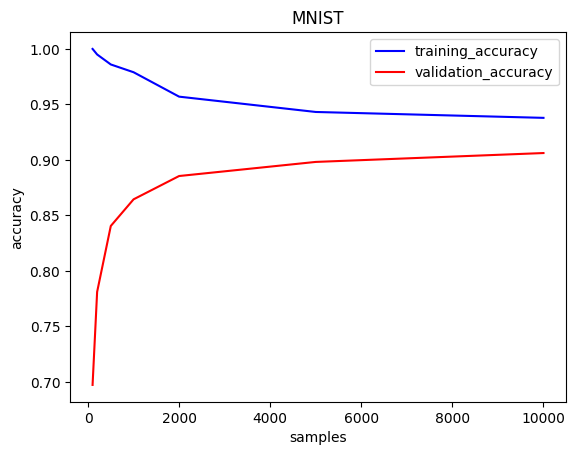

In [51]:
samples, training_accuracy, validation_accuracy = SVM_MNIST()
SVM_Plt(samples, training_accuracy, validation_accuracy, 'MNIST')